<a href="https://colab.research.google.com/github/vitorvigano/tweet-sentiment-analysis/blob/main/Tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Efetua o download do arquivo baseado no seu ID do Google Drive.
file_id = '' # Substitua pelo seu ID
downloaded = drive.CreateFile({'id': file_id})

# Salva o arquivo na memória do Colab
downloaded.GetContentFile('tweet_data.csv')  

## **Análise e Exploração dos Dados**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Efetua a leitura do arquivo e o disponibiliza no formato de dataframe.
df = pd.read_csv("tweet_data.csv")

In [ ]:
#Exibe 10 registros de maneira aleatória para exploração dos dados.
df.sample(10)

,textID,tweet_text,sentiment
1005,1957474013,@divabat so sorry to hear that. I lost two ha...,negative
13111,1696087034,@bealove thank you my love,positive
13651,1751212512,@ijustine ... like you're stuff! Strange voic...,positive
6511,1964211150,i got stung. by a bee.,negative
15335,1752472882,Just had some delicious sushi from niko niko o...,positive
12691,1695692304,Sometimes all it takes to solve our problems i...,positive
17762,1753568654,@PerezHilton it looks like you have a lot of f...,positive
1898,1960162423,HES BACK!!!!! OH NOES!!!! have you missed me? ...,negative
16350,1753008360,read twilight and new moon keen to read eclips...,positive
13859,1751361334,i jus love doin night shifts...will be done in...,positive


In [ ]:
# Exibe o total de registros
print("Número total de tweets: {}".format(len(df)))

Número total de tweets: 18727


In [ ]:
# Matplotlib ajuda a entender a distribuição dos dados
import matplotlib.pyplot as plt

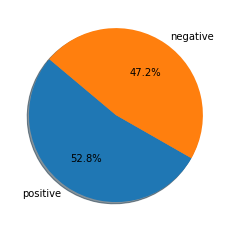

In [ ]:
sentiment_count = df["sentiment"].value_counts()
plt.pie(sentiment_count, labels=sentiment_count.index,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

In [ ]:
# Exibe o total de tweets para as classificações positivas e negativas
print("Número de tweets positivos: {}".format(df[df["sentiment"]=="positive"].count()[0]))
print("Número de tweets negativos: {}".format(df[df["sentiment"]=="negative"].count()[0]))

Número de tweets positivos: 9897
Número de tweets negativos: 8830


In [ ]:
# Wordcloud ajuda a mostrar as palavras mais utilizadas para cada um dos sentimentos
from wordcloud import WordCloud

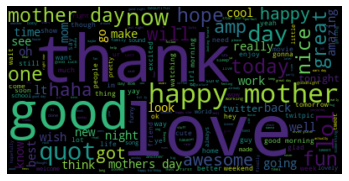

In [ ]:
pos_tweets = df[df["sentiment"]=="positive"]
txt = " ".join(tweet.lower() for tweet in pos_tweets["tweet_text"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

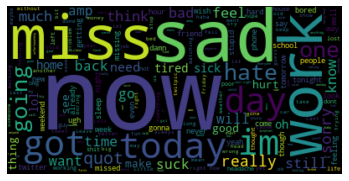

In [ ]:
neg_tweets = df[df["sentiment"]=="negative"]
txt = " ".join(tweet.lower() for tweet in neg_tweets["tweet_text"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## **Tratamento/Processamento**

In [ ]:
# Para remover os caracteres indesejados, utilizaremos regex
import re

In [ ]:
import re

tweet = "RT @SomeUser I love this! 👍 https://vitorvigano.xyz #NLP #Fun"

In [ ]:
# Funcao para remover as tags de encaminhamento
def replace_retweet(tweet, default_replace=""):
  tweet = re.sub('RT\s+', default_replace, tweet)
  return tweet

In [ ]:
print("Tweet sem a tag: {}".format(replace_retweet(tweet)))

Tweet sem a tag: @SomeUser I love this! 👍 https://vitorvigano.xyz #NLP #Fun


In [ ]:
# Funcao para remover as tags de usuário
def replace_user(tweet, default_replace="twitteruser"):
  tweet = re.sub('\B@\w+', default_replace, tweet)
  return tweet

In [ ]:
print("Tweet sem a tag de usuário: {}".format(replace_user(tweet)))

Tweet sem a tag de usuário: RT twitteruser I love this! 👍 https://vitorvigano.xyz #NLP #Fun


In [ ]:
pip install emoji --upgrade

In [ ]:
import emoji

In [ ]:
# Função para substituir emoji por texto com o seu significado
def demojize(tweet):
  tweet = emoji.demojize(tweet)
  return tweet

In [ ]:
print("Tweet com emoji processado: {}".format(demojize(tweet)))

Tweet com emoji processado: RT @SomeUser I love this! :thumbs_up: https://vitorvigano.xyz #NLP #Fun


In [ ]:
# Função para substituir http:// or https://
def replace_url(tweet, default_replace=""):
  tweet = re.sub('(http|https):\/\/\S+', default_replace, tweet)
  return tweet

In [ ]:
print("Tweet sem url: {}".format(replace_url(tweet)))

Tweet sem url: RT @SomeUser I love this! 👍  #NLP #Fun


In [ ]:
# Função para substituir hashtag
def replace_hashtag(tweet, default_replace=""):
  tweet = re.sub('#+', default_replace, tweet)
  return tweet

In [ ]:
print("Tweet sem hashtag: {}".format(replace_hashtag(tweet)))

Tweet sem hashtag: RT @SomeUser I love this! 👍 https://vitorvigano.xyz NLP Fun


In [ ]:
# Função para transformar todas as letras para minúsculas
def to_lowercase(tweet):
  tweet = tweet.lower()
  return tweet

In [ ]:
print("Tweet com letras minúsculas: {}".format(to_lowercase(tweet)))

Tweet com letras minúsculas: rt @someuser i love this! 👍 https://vitorvigano.xyz #nlp #fun


In [ ]:
# Função para remover repetição indesejada de caracteres
def word_repetition(tweet):
  tweet = re.sub(r'(.)\1+', r'\1\1', tweet)
  return tweet

In [ ]:
print("Tweet sem repeticao de caracteres: {}".format(word_repetition(tweet)))

Tweet sem repeticao de caracteres: RT @SomeUser I love this! 👍 https://vitorvigano.xyz #NLP #Fun


In [ ]:
# Função para remover pontuação repetida
def punct_repetition(tweet, default_replace=""):
  tweet = re.sub(r'[\?\.\!]+(?=[\?\.\!])', default_replace, tweet)
  return tweet

In [ ]:
print("Tweet sem pontuaçao repetida: {}".format(punct_repetition(tweet)))

Tweet sem pontuaçao repetida: RT @SomeUser I love this! 👍 https://vitorvigano.xyz #NLP #Fun


In [ ]:
pip install contractions

In [ ]:
# Precisamos transformar as contrações da língua inglesa para palavras com significado
import contractions

In [ ]:
# Lista de contrações da biblioteca
print(contractions.contractions_dict)

{"I'm": 'I am', "I'm'a": 'I am about to', "I'm'o": 'I am going to', "I've": 'I have', "I'll": 'I will', "I'll've": 'I will have', "I'd": 'I would', "I'd've": 'I would have', 'Whatcha': 'What are you', "amn't": 'am not', "ain't": 'are not', "aren't": 'are not', "'cause": 'because', "can't": 'cannot', "can't've": 'cannot have', "could've": 'could have', "couldn't": 'could not', "couldn't've": 'could not have', "daren't": 'dare not', "daresn't": 'dare not', "dasn't": 'dare not', "didn't": 'did not', 'didn’t': 'did not', "don't": 'do not', 'don’t': 'do not', "doesn't": 'does not', "e'er": 'ever', "everyone's": 'everyone is', 'finna': 'fixing to', 'gimme': 'give me', "gon't": 'go not', 'gonna': 'going to', 'gotta': 'got to', "hadn't": 'had not', "hadn't've": 'had not have', "hasn't": 'has not', "haven't": 'have not', "he've": 'he have', "he's": 'he is', "he'll": 'he will', "he'll've": 'he will have', "he'd": 'he would', "he'd've": 'he would have', "here's": 'here is', "how're": 'how are', "

In [ ]:
# Função para substituir as contrações
def fix_contractions(tweet):
  tweet = contractions.fix(tweet)
  return tweet

In [ ]:
print("Tweet processado: {}".format(fix_contractions(tweet)))

Tweet processado: RT @SomeUser I love this! 👍 https://vitorvigano.xyz #NLP #Fun


In [ ]:
pip install nltk

In [ ]:
# A tokenização separa uma frase em unidades distintas
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Exemplo
tweet = "These are different words!"

In [ ]:
# Função para tokenizar o tweet
def tokenize(tweet):
  tokens = word_tokenize(tweet)
  return tokens

In [ ]:
# Porém verificamos que a tokenizaçao padrao mantém pontos e números, o que não traz significado para nossa classificação
print(type(tokenize(tweet)))
print("Tweet tokens: {}".format(tokenize(tweet)))

<class 'list'>
Tweet tokens: ['These', 'are', 'different', 'words', '!']


In [ ]:
import string

In [ ]:
# Exibe todas as pontuações da língua inglesa
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
# Stop words são palavras que não são úteis para nosso domínio
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'theirs', 'have', 'of', 'any', 'more', 'below', 'off', 'couldn', 'has', 'from', 'he', 'an', 'yours', 'that', 'between', 'each', 'as', 'until', "doesn't", 'those', "hasn't", 'did', "mightn't", 'were', 'where', 'into', 'shouldn', 'mightn', 'is', 'with', 'too', 'through', "mustn't", "won't", 'don', 'than', "needn't", "it's", 'himself', 'themselves', 're', 'about', 'few', 'hasn', "didn't", 'what', 'our', 'your', 'such', "should've", 'then', 'here', 'above', "weren't", 'haven', 'they', 'ours', 'am', 'itself', 'you', 'aren', 'hers', 'by', 'can', 'we', 'had', 'are', 'y', 'while', "you'd", 'no', 'mustn', 'before', 'just', "couldn't", 'whom', "hadn't", 'during', 'didn', 'up', 'both', 'why', "isn't", 'to', 'because', 'doesn', 'won', "you'll", 'his', 'who', 'how', 'now', 'and', 'she', 'these', 'in', 'll', "she's", 'was', 'this', 'on', 'doing', 's', "haven't", "shan't", "aren't", 'shan', 'her', 'them', 'ain', 'ourselves', 'will', 'him', 'for', 'once', 'own', 'over', 'or', "you've", 've', 'weren',

In [ ]:
# Como a palavra not pode caracterizar um sentimento, ela será mantida
stop_words.discard('not')
print(stop_words)

{'theirs', 'have', 'of', 'any', 'more', 'below', 'off', 'couldn', 'has', 'from', 'he', 'an', 'yours', 'that', 'between', 'each', 'as', 'until', "doesn't", 'those', "hasn't", 'did', "mightn't", 'were', 'where', 'into', 'shouldn', 'mightn', 'is', 'with', 'too', 'through', "mustn't", "won't", 'don', 'than', "needn't", "it's", 'himself', 'themselves', 're', 'about', 'few', 'hasn', "didn't", 'what', 'our', 'your', 'such', "should've", 'then', 'here', 'above', "weren't", 'haven', 'they', 'ours', 'am', 'itself', 'you', 'aren', 'hers', 'by', 'can', 'we', 'had', 'are', 'y', 'while', "you'd", 'no', 'mustn', 'before', 'just', "couldn't", 'whom', "hadn't", 'during', 'didn', 'up', 'both', 'why', "isn't", 'to', 'because', 'doesn', 'won', "you'll", 'his', 'who', 'how', 'now', 'and', 'she', 'these', 'in', 'll', "she's", 'was', 'this', 'on', 'doing', 's', "haven't", "shan't", "aren't", 'shan', 'her', 'them', 'ain', 'ourselves', 'will', 'him', 'for', 'once', 'own', 'over', 'or', "you've", 've', 'weren',

In [ ]:
# Função para tokenizar o tweet
def custom_tokenize(tweet):
  token_list = word_tokenize(tweet)
  token_list = [token for token in token_list
                  if token not in string.punctuation]
  token_list = [token for token in token_list if token.isalpha()]
  stop_words = set(stopwords.words('english'))
  stop_words.discard('not')
  token_list = [token for token in token_list if not token in stop_words]
  return token_list

In [ ]:
tweet = "these are different words!"

In [ ]:
print("Tweet tokens: {}".format(custom_tokenize(tweet)))

Tweet tokens: ['different', 'words']


In [ ]:
# A Stemização reduz as palavras para a sua forma base
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer

In [ ]:
tokens = ["manager", "management", "managing"]

In [ ]:
# Existem vários métodos de stemização, alguns mais agressivos que outros
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()
snoball_stemmer = SnowballStemmer('english')

In [ ]:
# Função que recebe tokens e transforma na sua forma base
def stem_tokens(tokens, stemmer):
  token_list = []
  for token in tokens:
    token_list.append(stemmer.stem(token))
  return token_list

In [ ]:
print("Porter stems: {}".format(stem_tokens(tokens, porter_stemmer)))
print("Lancaster stems: {}".format(stem_tokens(tokens, lancaster_stemmer)))
print("Snowball stems: {}".format(stem_tokens(tokens, snoball_stemmer)))

Porter stems: ['manag', 'manag', 'manag']
Lancaster stems: ['man', 'man', 'man']
Snowball stems: ['manag', 'manag', 'manag']


In [ ]:
tokens = ["international", "companies", "had", "interns"]

In [ ]:
print("Porter stems: {}".format(stem_tokens(tokens, porter_stemmer)))
print("Lancaster stems: {}".format(stem_tokens(tokens, lancaster_stemmer)))
print("Snowball stems: {}".format(stem_tokens(tokens, snoball_stemmer)))

Porter stems: ['intern', 'compani', 'had', 'intern']
Lancaster stems: ['intern', 'company', 'had', 'intern']
Snowball stems: ['intern', 'compani', 'had', 'intern']


In [ ]:
# Lematização reduz as palavras a sua forma base e agrupa as suas diferentes formas
# Ao contrário do stemming, gera apenas palavras existentes
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
tokens = ["international", "companies", "had", "interns"]

In [ ]:
word_type = {"international": wordnet.ADJ, 
             "companies": wordnet.NOUN, 
             "had": wordnet.VERB, 
             "interns": wordnet.NOUN
             }

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
# Função de lematização
def lemmatize_tokens(tokens, word_type, lemmatizer):
  token_list = []
  for token in tokens:
    token_list.append(lemmatizer.lemmatize(token, word_type[token]))
  return token_list

In [ ]:
print("Tweet lema: {}".format(
    lemmatize_tokens(tokens, word_type, lemmatizer)))

Tweet lemma: ['international', 'company', 'have', 'intern']


In [ ]:
# Vamos colocar todas as funções de normalização juntas e aplicar em um tweet complexo
complex_tweet = r"""RT @vitorvigano : he looooook, 
THis is a big and complex TWeet!!! 👍 ... 
We'd be glad if you couldn't normalize it! 
Check https://vitorvigano.xyz and LET ME KNOW!!! #NLP #Fun"""

In [ ]:
# Função para processar o tweet
def process_tweet(tweet, verbose=False):
  if verbose: print("Tweet antes: {}".format(tweet))  
  tweet = replace_retweet(tweet)
  tweet = replace_user(tweet, "") 
  tweet = replace_url(tweet) 
  tweet = replace_hashtag(tweet)

  if verbose: print("Tweet depois: {}".format(tweet))
  tweet = to_lowercase(tweet)
  tweet = fix_contractions(tweet)
  tweet = punct_repetition(tweet)
  tweet = word_repetition(tweet)
  tweet = demojize(tweet)

  tokens = custom_tokenize(tweet)
  stemmer = SnowballStemmer("english")
  stem = stem_tokens(tokens, stemmer)

  return stem

In [ ]:
print(process_tweet(complex_tweet, verbose=False))

['look', 'big', 'complex', 'tweet', 'would', 'glad', 'could', 'not', 'normal', 'check', 'let', 'know', 'nlp', 'fun']


In [ ]:
import random

In [ ]:
# Testa a pipeline de normalização com alguns tweets da nossa base
for i in range(5):
  tweet_id = random.randint(0,len(df))
  tweet = df.iloc[tweet_id]["tweet_text"]
  print(process_tweet(tweet, verbose=True))
  print("\n")

Tweet antes: Mobile phone check-in? Another fail! American's service came close, but crashed at the gate. I'm now 0 for 3.
Tweet depois: Mobile phone check-in? Another fail! American's service came close, but crashed at the gate. I'm now 0 for 3.
['mobil', 'phone', 'anoth', 'fail', 'american', 'servic', 'came', 'close', 'crash', 'gate']


Tweet antes: Goodmorning world!
Tweet depois: Goodmorning world!
['goodmorn', 'world']


Tweet antes: @WKJThD  Thanks for Following
Tweet depois:   Thanks for Following
['thank', 'follow']


Tweet antes: asda ready meal - i don't think i'll ever be the same again
Tweet depois: asda ready meal - i don't think i'll ever be the same again
['asda', 'readi', 'meal', 'not', 'think', 'ever']


Tweet antes: The Gray Hat Python book reminded me how many security tools are python version specific, which is a pain if you need to use all of them
Tweet depois: The Gray Hat Python book reminded me how many security tools are python version specific, which is a pain

In [ ]:
pip install -U scikit-learn

In [ ]:
# Vamos criar uma coluna em nosso dataframe, contendo o tokens resultantes do nosso 
# processamento
df["tokens"] = df["tweet_text"].apply(process_tweet)

In [ ]:
# Para que seja possível utilizar os sentimentos computacionalmente, o sentimento 
# será convertido para positivo = 1 e negativo = 0 e armazenado em uma nova coluna
df["tweet_sentiment"] = df["sentiment"].apply(lambda i: 1
                                              if i == "positive" else 0)
df.head(10)

,textID,tweet_text,sentiment,tokens,tweet_sentiment
0,1956967666,Layin n bed with a headache ughhhh...waitin o...,negative,"[layin, n, bed, headach, call]",0
1,1956967696,Funeral ceremony...gloomy friday...,negative,"[funer, friday]",0
2,1956967789,wants to hang out with friends SOON!,positive,"[want, hang, friend, soon]",1
3,1956968477,Re-pinging @ghostridah14: why didn't you go to...,negative,"[not, go, prom, bc, bf, not, like, friend]",0
4,1956968636,Hmmm. http://www.djhero.com/ is down,negative,[hmm],0
5,1956969035,@charviray Charlene my love. I miss you,negative,"[charlen, love, miss]",0
6,1956969172,@kelcouch I'm sorry at least it's Friday?,negative,"[sorri, least, friday]",0
7,1956969531,Choked on her retainers,negative,"[choke, retain]",0
8,1956970047,Ugh! I have to beat this stupid song to get to...,negative,"[ugh, beat, stupid, song, get, next, rude]",0
9,1956970424,@BrodyJenner if u watch the hills in london u ...,negative,"[watch, hill, london, realis, tourtur, week, w...",0


In [ ]:
# Vamos criar 2 listas, a primeira com os tweets agrupados por seus tokens e a 
# segunda contendo o respectivo sentimento
X = df["tokens"].tolist()
y = df["tweet_sentiment"].tolist()

In [ ]:
print(X)
print(y)

[['layin', 'n', 'bed', 'headach', 'call'], ['funer', 'friday'], ['want', 'hang', 'friend', 'soon'], ['not', 'go', 'prom', 'bc', 'bf', 'not', 'like', 'friend'], ['hmm'], ['charlen', 'love', 'miss'], ['sorri', 'least', 'friday'], ['choke', 'retain'], ['ugh', 'beat', 'stupid', 'song', 'get', 'next', 'rude'], ['watch', 'hill', 'london', 'realis', 'tourtur', 'week', 'week', 'late', 'watch', 'itonlinelol'], ['sleepi', 'not', 'even', 'late', 'fail'], ['ladi', 'gaga', 'tweet', 'not', 'impress', 'video', 'leak', 'know'], ['convinc', 'alway', 'want', 'signal', 'give', 'think', 'lost', 'anoth', 'friend'], ['way', 'home', 'n', 'deal', 'w', 'underag', 'girl', 'drink', 'gin', 'da', 'bus', 'talk', 'bout', 'feel', 'old'], ['sorri', 'peopl', 'rude', 'isaac', 'get', 'manner', 'know', 'better', 'lewd'], ['damm', 'server', 'still', 'need', 'hit', 'koxper', 'pass'], ['fudg', 'bs', 'whole', 'paper', 'tire', 'ugh', 'hate', 'school', 'time', 'sleep'], ['hate', 'cancer', 'hate', 'hate', 'hate'], ['annoy', 'sta

In [ ]:
corpus = [["love", "nlp"],
          ["miss", "you"],
          ["hate", "hate", "hate", "love"],
          ["happy", "love", "hate"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

In [ ]:
# Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Função para a geração das features (colunas)
def fit_cv(tweet_corpus):
  cv_vect = CountVectorizer(tokenizer=lambda x: x,
                            preprocessor=lambda x: x)
  cv_vect.fit(tweet_corpus)
  return cv_vect

In [ ]:
cv_vect = fit_cv(corpus)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [ ]:
cv_mtx = cv_vect.transform(corpus)
cv_mtx.toarray()

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0]])

In [ ]:
corpus = [["love", "nlp"],
          ["miss", "you"],
          ["hate", "hate", "hate", "love"],
          ["happy", "love", "hate"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

In [ ]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Função para a geração das features (colunas)
def fit_tfidf(tweet_corpus):
  tf_vect = TfidfVectorizer(preprocessor=lambda x: x,
                            tokenizer=lambda x: x)
  tf_vect.fit(tweet_corpus)
  return tf_vect

In [ ]:
tf_vect = fit_tfidf(corpus)
tf_mtx = tf_vect.transform(corpus)
tf_mtx.toarray()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.56921261, 0.        , 0.        , 0.82219037,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.70710678, 0.        , 0.        ,
        0.        , 0.        , 0.70710678],
       [0.        , 0.        , 0.        , 0.96260755, 0.        ,
        0.        , 0.27089981, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.68172171, 0.55902156, 0.        ,
        0.        , 0.47196441, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.52182349, 0.        , 0.        , 0.42790272,
        0.52182349, 0.        , 0.        , 0.52182349, 0.        ,
        0.        , 0.        , 0.        ],
       [0.52182349, 0.        , 0.        , 0.        , 0.42790272,
        0.        , 0.     

In [ ]:
import seaborn as sn

# Função para gerar a matriz de confusão com os resultados
def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f')
  plt.xlabel("Predição")
  plt.ylabel("Valor Real")
  plt.title("Matriz de Confusão")
  return sn

## **Regressão Logística**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Separação dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    train_size=0.80)

In [ ]:
# Regressão Logística
from sklearn.linear_model import LogisticRegression

In [ ]:
# Função para treinamento do modelo
def fit_lr(X_train, y_train):
  model = LogisticRegression()
  model.fit(X_train, y_train)
  return model

In [ ]:
# Utilização dos vetores gerados por bag of words
cv = fit_cv(X_train)
X_train_cv = cv.transform(X_train)
X_test_cv = cv.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [ ]:
# Modelo gerado a partir dos vetores de bag of words
model_lr_cv = fit_lr(X_train_cv, y_train)

In [ ]:
# Utilização dos vetores gerados por TF-IDF
tf = fit_tfidf(X_train)
X_train_tf = tf.transform(X_train)
X_test_tf = tf.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [ ]:
# Modelo gerado a partir dos vetores de TF-IDF
model_lr_tf = fit_lr(X_train_tf, y_train)

## **Análise dos Resultados**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred_lr_cv = model_lr_cv.predict(X_test_cv)

In [ ]:
print("Precisão do modelo gerado a partir de bag of words: {:.2%}".format(accuracy_score(y_test, y_pred_lr_cv)))

Precisão do modelo gerado a partir de bag of words: 88.65%


<module 'seaborn' from '/usr/local/lib/python3.7/dist-packages/seaborn/__init__.py'>

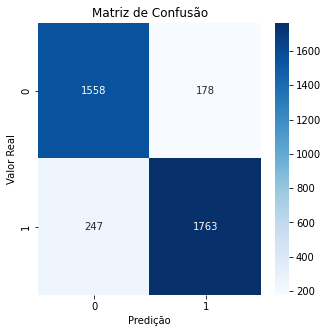

In [ ]:
plot_confusion(confusion_matrix(y_test, y_pred_lr_cv))

In [ ]:
y_pred_lr_tf = model_lr_tf.predict(X_test_tf)

In [ ]:
print("Precisão do modelo gerado a partir de TF-IDF: {:.2%}".format(accuracy_score(y_test, y_pred_lr_tf)))

Precisão do modelo gerado a partir de TF-IDF: 88.71%


<module 'seaborn' from '/usr/local/lib/python3.7/dist-packages/seaborn/__init__.py'>

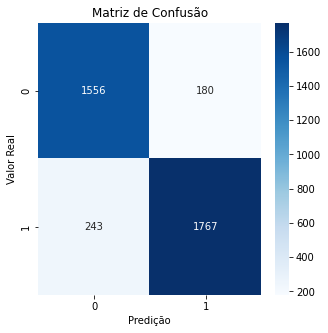

In [ ]:
plot_confusion(confusion_matrix(y_test, y_pred_lr_tf))

In [ ]:
your_tweet = """RT @Vitorvigano: I am so sad this night. My dog has passed away"""

In [ ]:
def predict_tweet(tweet):
  processed_tweet = process_tweet(tweet)
  transformed_tweet = tf.transform([processed_tweet])
  prediction = model_lr_tf.predict(transformed_tweet)

  if prediction == 1:
    return "O Tweet é de sentimento positivo!"
  else:
    return "O Tweet é de sentimento negativo!"

In [ ]:
predict_tweet(your_tweet)

'O Tweet é de sentimento negativo!'